In [19]:
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'

from scipy.stats import norm

# DAG examples



## Minimal Example

A simple causal relation, $Y$ being causally affected by $T$:

$T \rightarrow Y$

[0.97692795 0.93425001]
[1.72433577e-17 5.27292094e-15]


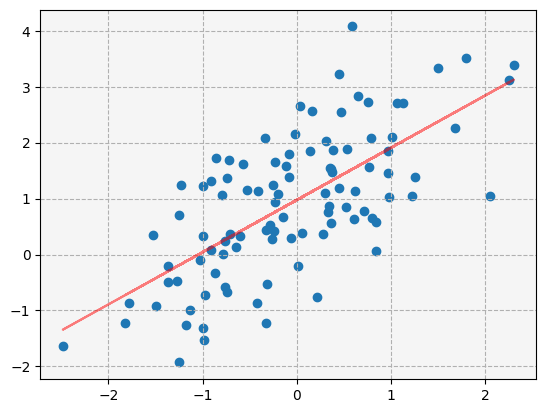

In [21]:
t = norm(0, 1).rvs(100)
y = 1 + t + norm(0, 1).rvs(100)

mod = sm.OLS(y, sm.add_constant(t)).fit()
print(mod.params)
print(mod.pvalues)

fig, ax = plt.subplots()
ax.scatter(t, y)
ax.plot(t, mod.predict(sm.add_constant(t)), color='red', alpha=.5)
plt.show()

## Minimal Mediator

$T \rightarrow M \rightarrow Y$

In [23]:
t = norm(0, 1).rvs(100)
m = 1 + t + norm(0, 1).rvs(100)
y = 1 + m + norm(0, 1).rvs(100)

X1 = sm.add_constant(np.array([t, m]).T)
X2 = sm.add_constant(t)

mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     116.5
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.61e-26
Time:                        11:54:16   Log-Likelihood:                -129.05
No. Observations:                 100   AIC:                             264.1
Df Residuals:                      97   BIC:                             271.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9193      0.143      6.408      0.0

Correct model should be regressing $Y$ on $T$, ignoring $M$

## Mediator with Confounder

$T \rightarrow M \rightarrow Y$

$X \rightarrow M$

In [26]:
t = norm(0, 1).rvs(100)
x = norm(0, 1).rvs(100)
m = 1 + t + x + norm(0, 1).rvs(100)
y = 1 + m + norm(0, 1).rvs(100)

# -> solved models is y = 2 + t + x + noise

X1 = sm.add_constant(np.array([t, m, x]).T)
X2 = sm.add_constant(t)
X3 = sm.add_constant(np.array([t, x]).T)

mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

mod3 = sm.OLS(y, X3).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     67.87
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.23e-23
Time:                        11:55:47   Log-Likelihood:                -137.42
No. Observations:                 100   AIC:                             282.8
Df Residuals:                      96   BIC:                             293.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2442      0.151      8.256      0.0

Correct Model should be regressing $Y$ on $T$ and $X$, ignoring $M$.

## Minimal Collider

$T \rightarrow Y$

$T \rightarrow C \leftarrow Y$

In [27]:
t = norm(0, 1).rvs(100)
y = 1 + t + norm(0, 1).rvs(100)
c = t + y + norm(0, 1).rvs(100)

X1 = sm.add_constant(np.array([t, c]).T)
X2 = sm.add_constant(t)

mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     168.1
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           3.04e-32
Time:                        11:55:51   Log-Likelihood:                -104.78
No. Observations:                 100   AIC:                             215.6
Df Residuals:                      97   BIC:                             223.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3370      0.085      3.970      0.0

Nicely illustrates how controlling for the collider breaks the causal analysis.

## Collider plus Confounder

$T \rightarrow Y$

$T \rightarrow C \leftarrow A \rightarrow Y$

$ C \rightarrow Y$




In [28]:
t = norm(0, 1).rvs(100)
a = norm(0, 1).rvs(100)
c = t + a + norm(0, 1).rvs(100)
y = 1 + t + a + c + norm(0, 1).rvs(100)

X1 = sm.add_constant(np.array([t, a]).T)
X2 = sm.add_constant(t)
X3 = sm.add_constant(np.array([t, c, a]).T)
X4 = sm.add_constant(np.array([t, c]).T)


mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

mod3 = sm.OLS(y, X3).fit()
print(mod3.summary())

mod4 = sm.OLS(y, X4).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     169.4
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           2.26e-32
Time:                        11:56:04   Log-Likelihood:                -187.62
No. Observations:                 100   AIC:                             381.2
Df Residuals:                      97   BIC:                             389.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0829      0.168      6.429      0.0

Controlling for $T, C, A$ is the correct way